In [29]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

PWD=os.getcwd()

PATH=os.path.join(PWD,"FSIM_N_L")

items = os.listdir(PATH)

directories = [item for item in items if (os.path.isdir(os.path.join(PATH,item)))]

Final_report = pd.DataFrame()

for config in directories:
    dir = os.path.join(PATH,config)    
    list_items = os.listdir(dir)    
    sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]

    #merge_files_path=os.path.join(dir,sim_dir[0])
    merge_files_path=dir
    print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])  
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report["FsimID"]=None    
    index=(full_report['bit_faulty_pos']>-1)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[0])

    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)

print(Final_report.head())

index = (Final_report['split_config']=='cnf77')

Final_report.loc[index,'split_config']='ResNet50'

Final_report['block_fault_rate']=Final_report['block_fault_rate'].round(2)
Final_report['block_fault_rate']=Final_report['block_fault_rate']*100


['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
   layer_start  layer_stop  size_tail_y  size_tail_x  block_fault_rate  \
0            0           0           32           32               0.2   
1            0           0           32           32               0.2   
2            0           0           32           32               0.2   
3            0           0           32           32               0.2   
4            0           0           32           32               0.2   

   neuron_fault_rate  bit_faulty_pos  gold_ACC@1  gold_ACC@k  img_Top1_Crit  \
0               0.02              19   60.560001   83.879997             48   
1               0.02              19   60.560001   83.879997 

In [ ]:
print(Final_report.head())

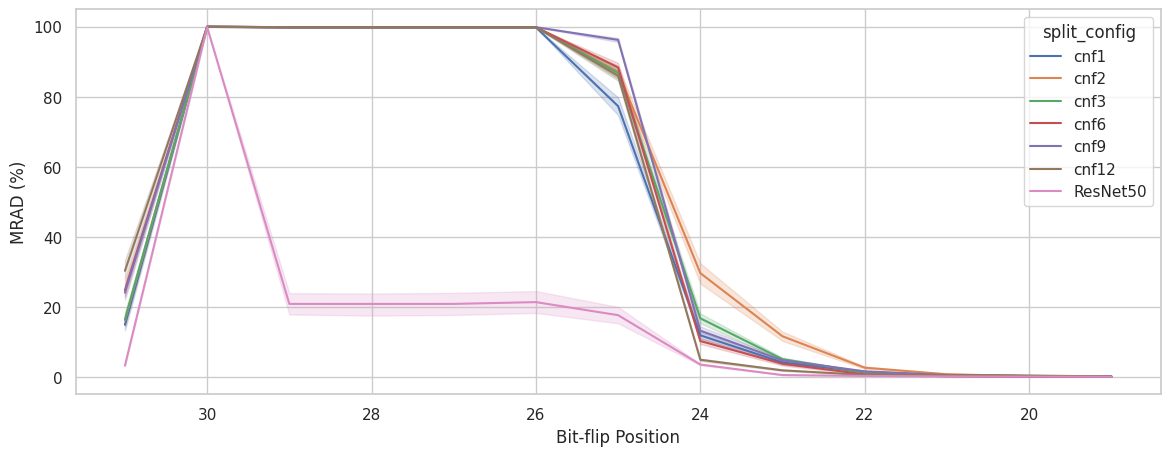

In [77]:

index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']!=5)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(14, 5))
#sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config')
ax.invert_xaxis()
#ax.legend(loc='lower left')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper right")
#ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')
ax.set_ylabel('MRAD (%)')
ax.set_xlabel('Bit-flip Position')
f.savefig('bit-flip.pdf',format='pdf',bbox_inches='tight')

Text(0.5, 0, 'layer')

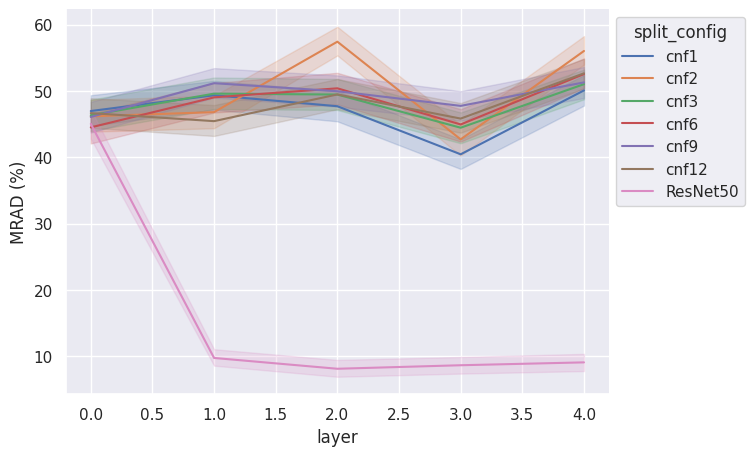

In [56]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='layer_start',y='MRAD',hue='split_config')
#ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax, "upper left")
#ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')
ax.set_ylabel('MRAD (%)')
ax.set_xlabel('layer')

Text(0.5, 1.0, 'MRAD: FI only in the last layer of the Head model (4)')

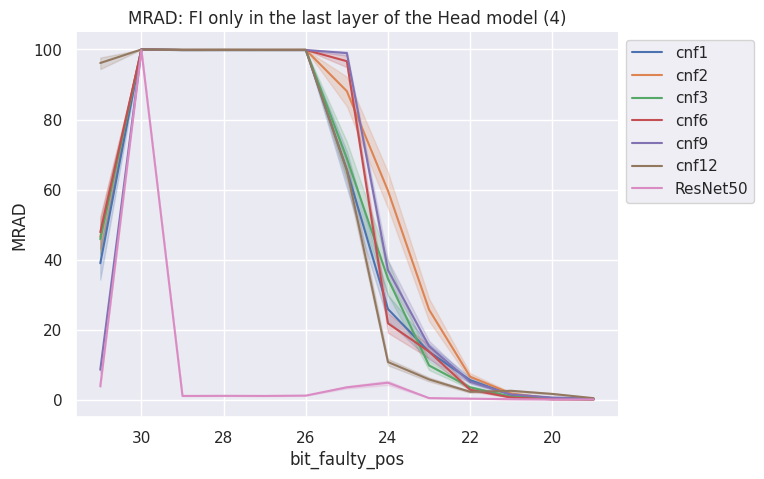

In [72]:

index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config')
ax.invert_xaxis()
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI only in the last layer of the Head model (4)")

#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: FI all conv layers of Head model (0-4)')

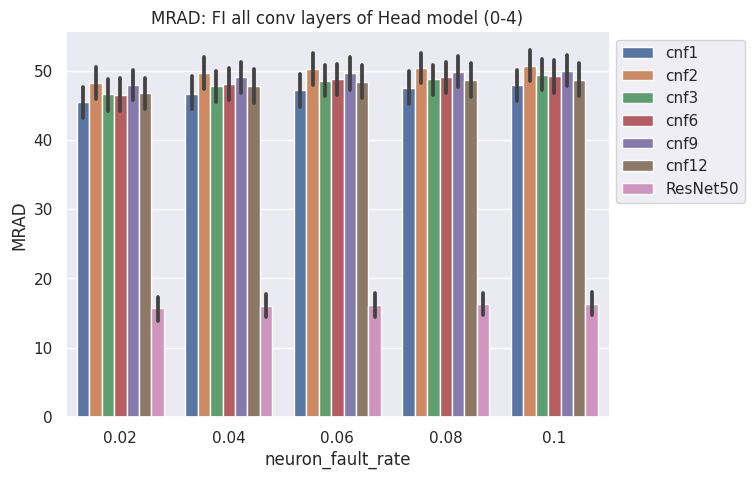

In [25]:
index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(9, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')

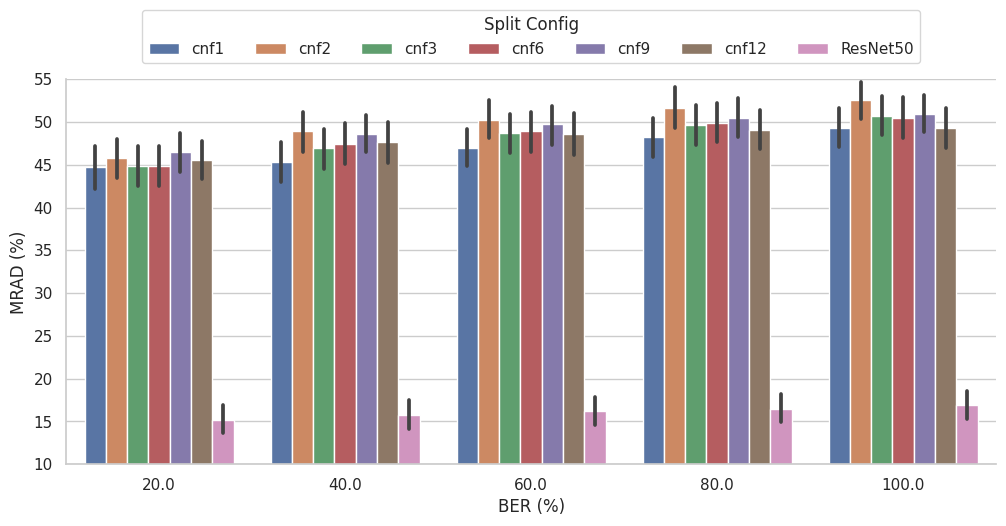

In [95]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='block_fault_rate',y='MRAD',hue='split_config')
#ax.legend(loc='lower left')
sns.move_legend(ax, "upper center", ncol=7,title='Split Config',bbox_to_anchor=(0.5,1.2))
ax.set_xlabel('BER (%)')
ax.set_ylabel('MRAD (%)')
ax.set_ylim(10,55)
#plt.legend(loc="upper center", ncol=7,title='Split Config',bbox_to_anchor=(1, 1))
f.savefig('BER.pdf',format='pdf',bbox_inches='tight')
#ax.set_ylim(40,60)
#ax.set_title("MRAD: FI only in the last layer of the Head model (4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: FI all conv layers of Head model (0-4)')

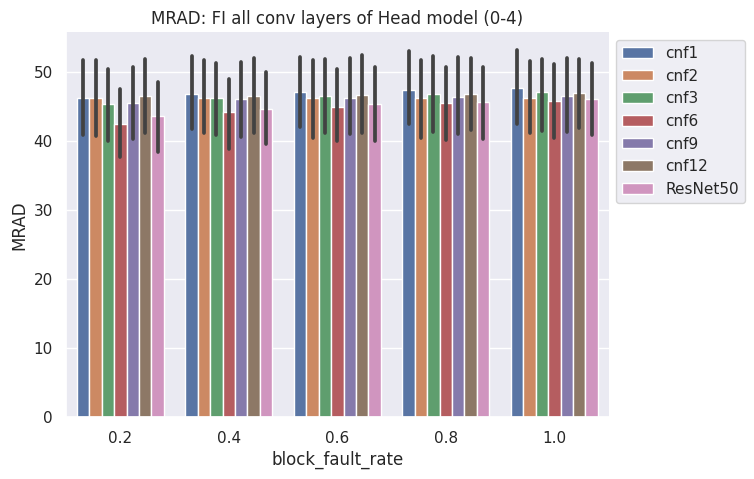

In [8]:
index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='block_fault_rate',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')

In [ ]:

index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations all conv layersd (0-4)")


In [ ]:
index = (Final_report['bit_faulty_pos']>0) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in last conv layer (4)")

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (0-4)')

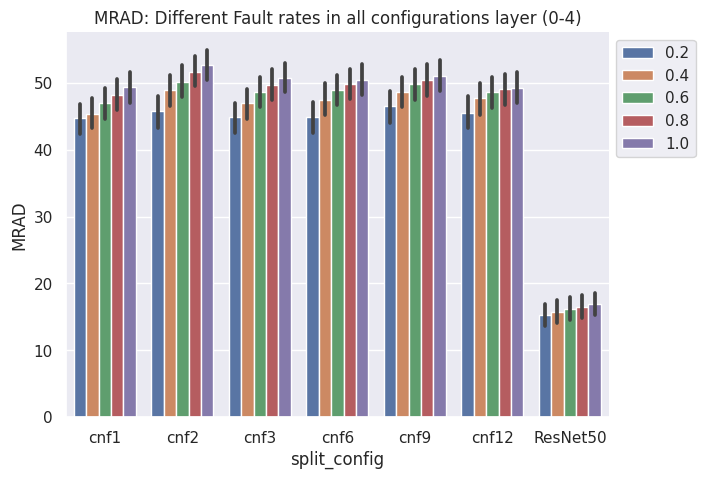

In [26]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (0-4)")

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (4)')

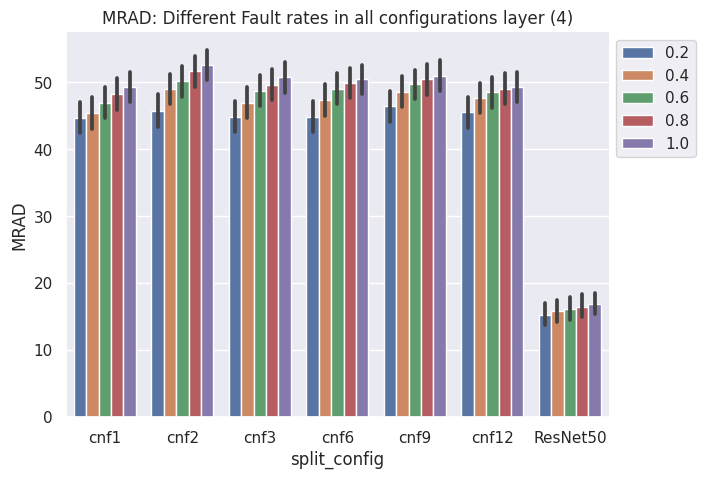

In [7]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

No handles with labels found to put in legend.


[Text(0, 0, '46.9169'),
 Text(0, 0, '49.8379'),
 Text(0, 0, '48.1822'),
 Text(0, 0, '48.2959'),
 Text(0, 0, '49.2585'),
 Text(0, 0, '48.0231'),
 Text(0, 0, '16.1081')]

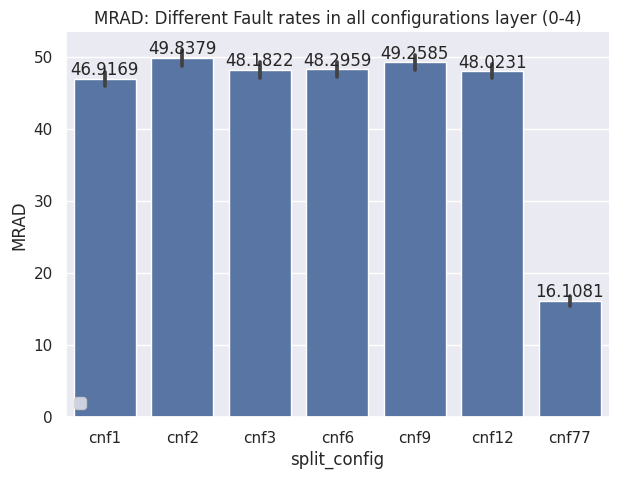

In [2]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD', color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (0-4)")
ax.bar_label(ax.containers[0])

In [ ]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

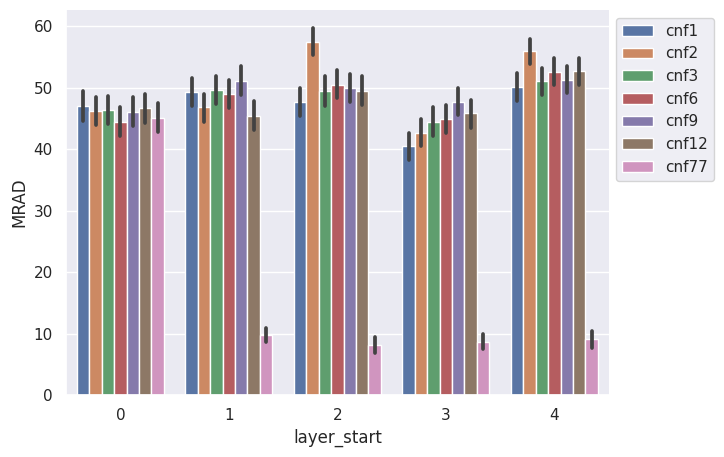

In [4]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='layer_start',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")